In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('TCGA-BRCA.htseq_fpkm.tsv',sep='\t')

In [3]:
dff = df.reset_index(drop=True)
dff

,Ensembl_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,ENSG00000242268.2,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
1,ENSG00000270112.3,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
2,ENSG00000167578.15,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60478,ENSG00000105063.17,3.680055,3.969785,3.011921,4.059347,4.249147,3.935869,4.082827,3.931459,3.870035,...,3.348868,3.650676,4.478325,3.520017,3.372176,3.772585,3.133380,4.186347,3.340223,3.966532
60479,ENSG00000231119.2,0.285640,0.115149,0.384451,0.345883,0.065679,0.837305,0.198863,0.216728,0.102007,...,0.329875,0.232873,0.069587,0.117933,0.343273,0.149851,0.270187,0.484561,0.127070,0.174248
60480,ENSG00000280861.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60481,ENSG00000123685.7,0.599579,1.382192,0.629043,0.396315,0.157504,0.662529,0.174878,1.724989,0.580636,...,0.487383,0.491877,1.261285,0.407713,0.379536,0.551165,0.611319,0.706170,0.683710,0.430933


In [4]:
df_T= dff.set_index(
    'Ensembl_ID').T.reset_index().rename_axis(None,axis=1).rename(columns= {"index":"Ensembl_ID"})

In [5]:
new_df = df_T.loc[:, (df_T!=0).any(axis=0)]

In [6]:
gene=new_df.drop(columns='Ensembl_ID')

In [7]:
gene

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,0.098232,0.073008,0.0,0.000000,0.000000,3.680055,0.285640,0.0,0.599579,0.0
1,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.000000,...,0.011167,0.000000,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
2,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,0.461624,...,0.322213,0.039503,0.0,0.092108,0.000000,3.011921,0.384451,0.0,0.629043,0.0
3,0.000000,0.000000,1.947481,0.0,2.808757,4.723270,0.0,0.002361,7.259318,0.088912,...,0.016356,0.118749,0.0,0.000000,0.000000,4.059347,0.345883,0.0,0.396315,0.0
4,0.000000,0.000000,2.734690,0.0,1.964479,3.770091,0.0,0.111647,7.643035,0.066036,...,0.034593,0.000000,0.0,0.113546,0.000000,4.249147,0.065679,0.0,0.157504,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.000000,0.000000,2.861514,0.0,2.120565,2.992269,0.0,0.037693,7.673599,0.535481,...,0.021983,0.066625,0.0,0.153477,0.000000,3.772585,0.149851,0.0,0.551165,0.0
1213,0.471630,0.000000,1.626213,0.0,1.605675,3.224406,0.0,0.039177,7.439460,0.775822,...,0.401469,0.017897,0.0,0.180659,0.127060,3.133380,0.270187,0.0,0.611319,0.0
1214,0.083825,0.000000,1.692995,0.0,2.055448,3.476192,0.0,0.033737,7.138577,0.220669,...,0.334910,0.000000,0.0,0.132664,0.000000,4.186347,0.484561,0.0,0.706170,0.0
1215,0.000000,0.005858,2.051916,0.0,2.195782,3.369091,0.0,0.031773,7.446467,0.249784,...,0.199790,0.101503,0.0,0.130170,0.000000,3.340223,0.127070,0.0,0.683710,0.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(gene)
gene_scaled=scaler.transform(gene)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca_95=PCA(n_components=.95,random_state=1234)
pca_95.fit(gene_scaled)
X_pca_95=pca_95.transform(gene_scaled)

In [12]:
X_pca_95

array([[-2.45315313e+01,  1.13428486e+01, -3.12848995e+01, ...,
         5.38398099e+00,  7.60183394e+00, -1.14584668e-01],
       [-1.85242490e+01,  3.41467280e+01, -1.82999108e+01, ...,
         1.07607832e+00, -2.47203118e-01, -7.52894664e-01],
       [ 4.89899768e+01, -3.78320879e+01,  1.10355854e+02, ...,
         1.00847819e+00,  2.65622587e-01,  2.77148136e-01],
       ...,
       [-5.77488549e+00, -2.31285951e+01,  5.62924846e+01, ...,
         1.03733633e+00, -1.71686026e+00,  3.48642712e-01],
       [-1.70675712e+01,  5.27161409e+00,  1.21883737e+01, ...,
         2.42740498e+00, -7.35898427e+00,  4.28154650e+00],
       [-1.04466968e+00,  2.67290313e+00,  3.42071346e-02, ...,
        -2.94052163e+00, -6.60527355e-01,  1.18484884e+00]])

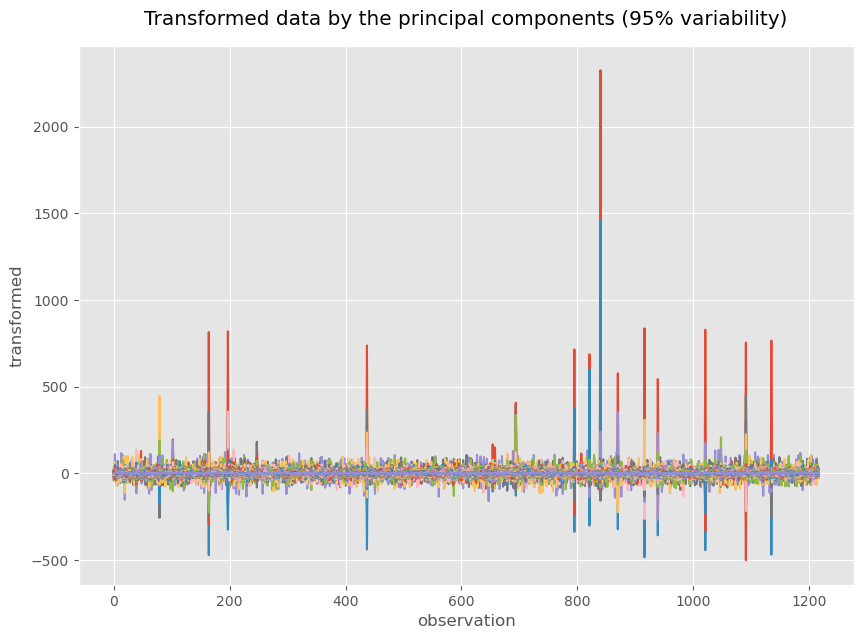

In [13]:
plt.figure(figsize=(10,7))
plt.plot(X_pca_95)
plt.xlabel('observation')
plt.ylabel('transformed')
plt.title('Transformed data by the principal components (95% variability)',pad=15)
plt.savefig('plot.png')

In [14]:
new_pd=pd.DataFrame(X_pca_95)

In [15]:
new_pd.shape

(1217, 878)

In [16]:
extracted_col = df_T["Ensembl_ID"]
print("column to added from first dataframe to second:")
display(extracted_col)
  

column to added from first dataframe to second:


0       TCGA-E9-A1NI-01A
1       TCGA-A1-A0SP-01A
2       TCGA-BH-A1EU-11A
3       TCGA-A8-A06X-01A
4       TCGA-E2-A14T-01A
              ...       
1212    TCGA-EW-A1P3-01A
1213    TCGA-A7-A13F-11A
1214    TCGA-A2-A0T6-01A
1215    TCGA-A7-A5ZW-01A
1216    TCGA-BH-A203-01A
Name: Ensembl_ID, Length: 1217, dtype: object

In [17]:
new_pd.insert(0, "Ensembl_ID", extracted_col)

In [18]:
new_pd

,Ensembl_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [19]:
new_pd_gene=new_pd.rename(columns={'Ensembl_ID':'sample_ID'})
new_pd_gene

,sample_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [20]:
new_pd_gene

,sample_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [21]:
rna=pd.read_csv('TCGA-BRCA.mirna.tsv',sep='\t')
rna

,miRNA_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-LL-A5YP-01A,TCGA-E2-A14T-01A,TCGA-AR-A24O-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-E9-A24A-01A,TCGA-E9-A1RB-01A,...,TCGA-E2-A1L6-01A,TCGA-BH-A0DT-11A,TCGA-A2-A0SV-01A,TCGA-BH-A0BO-01A,TCGA-B6-A0RN-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,hsa-let-7a-1,12.686183,12.891305,12.887718,14.108360,13.461873,12.265034,12.998680,13.383760,12.845777,...,12.978411,14.018583,12.404741,13.441146,13.168463,12.648896,14.119837,12.751446,13.497555,13.377192
1,hsa-let-7a-2,12.662222,12.869347,12.879000,14.118814,13.476615,12.241975,13.005067,13.380326,12.844904,...,12.960026,14.003807,12.380744,13.449313,13.154539,12.662858,14.135787,12.752993,13.505774,13.359864
2,hsa-let-7a-3,12.702090,12.888348,12.900761,14.155944,13.488667,12.290275,12.997857,13.388873,12.853264,...,12.967357,14.035824,12.439656,13.443056,13.196045,12.676500,14.147772,12.762161,13.497234,13.375518
3,hsa-let-7b,13.954108,15.019690,13.485065,13.811893,15.261777,13.809151,13.627295,14.974551,14.759085,...,14.674505,14.873317,14.013927,15.261052,16.636407,14.392788,14.788002,14.928173,14.451789,14.947434
4,hsa-let-7c,10.343736,10.822866,10.325324,11.047247,12.039291,9.057759,11.581334,10.195591,9.996306,...,11.401806,13.281604,9.512755,12.257532,11.504708,10.826527,13.046762,11.080933,12.224227,10.234638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,hsa-mir-9500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1877,hsa-mir-96,5.486710,5.365221,4.935182,5.246102,4.682331,5.539974,2.952988,4.192225,3.703261,...,6.000770,3.365852,3.899755,4.825829,5.970415,5.630192,1.504278,3.069699,4.148438,3.420965
1878,hsa-mir-98,5.943471,6.053592,6.782349,4.794847,5.562759,6.602330,5.489263,6.138740,6.054672,...,5.144954,5.184865,5.697202,5.400939,4.763354,5.390010,5.901553,5.274988,5.420709,5.022092
1879,hsa-mir-99a,8.977608,9.241627,8.264888,9.254036,10.691980,7.303956,9.875042,8.418708,8.616531,...,10.545658,11.636532,7.668619,10.337282,9.666720,9.517134,11.459398,9.178330,9.467839,9.313761


In [22]:
rna1 = rna.reset_index(drop=True)
rna1

,miRNA_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-LL-A5YP-01A,TCGA-E2-A14T-01A,TCGA-AR-A24O-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-E9-A24A-01A,TCGA-E9-A1RB-01A,...,TCGA-E2-A1L6-01A,TCGA-BH-A0DT-11A,TCGA-A2-A0SV-01A,TCGA-BH-A0BO-01A,TCGA-B6-A0RN-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,hsa-let-7a-1,12.686183,12.891305,12.887718,14.108360,13.461873,12.265034,12.998680,13.383760,12.845777,...,12.978411,14.018583,12.404741,13.441146,13.168463,12.648896,14.119837,12.751446,13.497555,13.377192
1,hsa-let-7a-2,12.662222,12.869347,12.879000,14.118814,13.476615,12.241975,13.005067,13.380326,12.844904,...,12.960026,14.003807,12.380744,13.449313,13.154539,12.662858,14.135787,12.752993,13.505774,13.359864
2,hsa-let-7a-3,12.702090,12.888348,12.900761,14.155944,13.488667,12.290275,12.997857,13.388873,12.853264,...,12.967357,14.035824,12.439656,13.443056,13.196045,12.676500,14.147772,12.762161,13.497234,13.375518
3,hsa-let-7b,13.954108,15.019690,13.485065,13.811893,15.261777,13.809151,13.627295,14.974551,14.759085,...,14.674505,14.873317,14.013927,15.261052,16.636407,14.392788,14.788002,14.928173,14.451789,14.947434
4,hsa-let-7c,10.343736,10.822866,10.325324,11.047247,12.039291,9.057759,11.581334,10.195591,9.996306,...,11.401806,13.281604,9.512755,12.257532,11.504708,10.826527,13.046762,11.080933,12.224227,10.234638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,hsa-mir-9500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1877,hsa-mir-96,5.486710,5.365221,4.935182,5.246102,4.682331,5.539974,2.952988,4.192225,3.703261,...,6.000770,3.365852,3.899755,4.825829,5.970415,5.630192,1.504278,3.069699,4.148438,3.420965
1878,hsa-mir-98,5.943471,6.053592,6.782349,4.794847,5.562759,6.602330,5.489263,6.138740,6.054672,...,5.144954,5.184865,5.697202,5.400939,4.763354,5.390010,5.901553,5.274988,5.420709,5.022092
1879,hsa-mir-99a,8.977608,9.241627,8.264888,9.254036,10.691980,7.303956,9.875042,8.418708,8.616531,...,10.545658,11.636532,7.668619,10.337282,9.666720,9.517134,11.459398,9.178330,9.467839,9.313761


In [23]:
rna2= rna1.set_index(
    'miRNA_ID').T.reset_index().rename_axis(None,axis=1).rename(columns= {"index":"miRNA_ID"})

In [24]:
new_df1 = rna2.loc[:, (rna2!=0).any(axis=0)]

In [25]:
rna3=new_df1.drop(columns='miRNA_ID')

In [26]:
rna3.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,12.686183,12.662222,12.702090,13.954108,10.343736,9.295373,9.635422,10.590267,10.619278,9.196173,...,4.145751,0.0,0.000000,0.0,0.000000,1.626492,5.486710,5.943471,8.977608,16.204958
1,12.891305,12.869347,12.888348,15.019690,10.822866,9.947921,9.849888,10.752409,10.725704,9.326014,...,3.260019,0.0,3.338596,0.0,0.000000,4.381362,5.365221,6.053592,9.241627,14.983204
2,12.887718,12.879000,12.900761,13.485065,10.325324,9.747751,11.101686,11.889678,11.923924,8.743178,...,2.642097,0.0,2.718220,0.0,0.225409,1.428192,4.935182,6.782349,8.264888,15.917452
3,14.108360,14.118814,14.155944,13.811893,11.047247,7.606842,9.403753,11.586679,11.607801,8.834157,...,3.382545,0.0,2.269815,0.0,1.013901,1.013901,5.246102,4.794847,9.254036,15.303411
4,13.461873,13.476615,13.488667,15.261777,12.039291,8.730956,9.516602,11.293465,11.286356,8.520303,...,0.911711,0.0,1.865453,0.0,0.526707,1.466000,4.682331,5.562759,10.691980,15.412182


In [27]:
A=rna3.values
A.shape

(1202, 1604)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(A)
A_scaled=scaler.transform(A)

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca_95=PCA(n_components=.95,random_state=1234)
pca_95.fit(A_scaled)
A_pca_95=pca_95.transform(A_scaled)

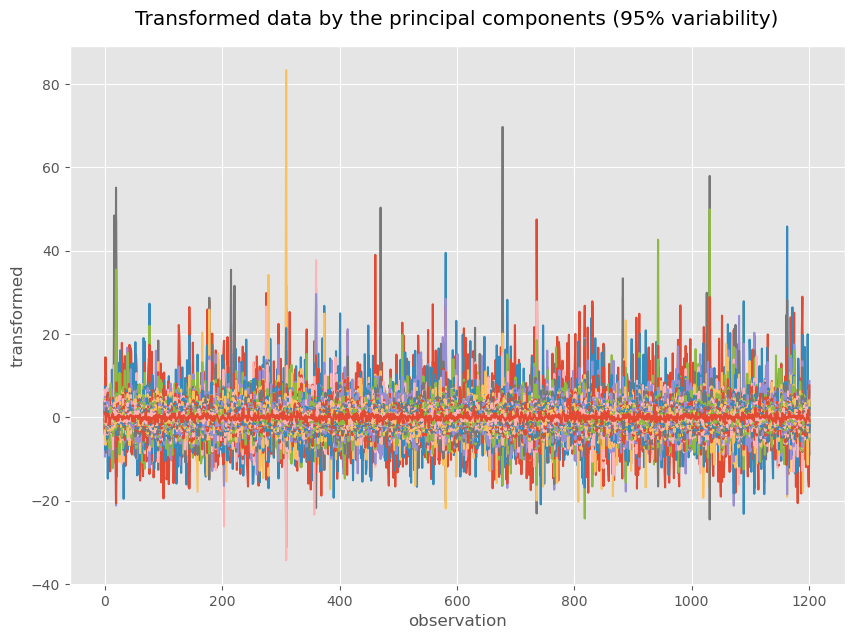

In [31]:
plt.figure(figsize=(10,7))
plt.plot(A_pca_95)
plt.xlabel('observation')
plt.ylabel('transformed')
plt.title('Transformed data by the principal components (95% variability)',pad=15)
plt.savefig('plot.png')

In [32]:
new_pd1=pd.DataFrame(A_pca_95)

In [33]:
new_pd1.head()

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
0,6.533957,-2.406532,-9.413739,2.391903,2.825275,0.013140,-2.177606,3.284697,-4.178565,-2.698059,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,14.408807,2.077421,5.997785,-1.624469,1.739537,4.392684,-1.075847,-6.703453,-0.671694,4.021331,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,10.051427,3.453803,5.221299,-8.463352,3.113520,6.031570,-3.398830,4.575557,-1.416554,-0.647369,...,0.152150,0.101182,-0.219033,-1.089174,-1.542839,2.118969,-0.703558,-0.523260,-1.844320,-1.148169
3,-0.874134,0.470171,-2.688745,1.078031,2.349833,-1.692876,2.723819,0.787323,1.502769,0.310545,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
4,-6.984240,2.260182,-2.494726,1.159850,-1.135161,-2.271852,-2.147577,-0.773485,0.232533,-2.008648,...,0.095129,0.282001,-0.031639,0.244799,0.273035,0.148204,0.232514,0.245772,0.322323,0.305413


In [34]:
df1_1=rna2

In [35]:
extracted_col_1 = df1_1["miRNA_ID"]
print("column to added from first dataframe to second:")
display(extracted_col_1)
  

column to added from first dataframe to second:


0       TCGA-E9-A1NI-01A
1       TCGA-A1-A0SP-01A
2       TCGA-LL-A5YP-01A
3       TCGA-E2-A14T-01A
4       TCGA-AR-A24O-01A
              ...       
1197    TCGA-EW-A1P3-01A
1198    TCGA-A7-A13F-11A
1199    TCGA-A2-A0T6-01A
1200    TCGA-A7-A5ZW-01A
1201    TCGA-BH-A203-01A
Name: miRNA_ID, Length: 1202, dtype: object

In [36]:
new_pd1.insert(0, "miRNA_ID", extracted_col_1)

In [37]:
new_pd1.to_csv("RNA_Expression_data_filtered_with_PCA",index=False)

In [38]:
#Concatenate two datasets on sample
#embed_data = pd.merge(new_pd_gene,
    #new_rna,
    #how="inner",
    #on="sample")
#embed_data

In [39]:
new_pd1
new_pd_gene

,sample_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [40]:
new_pd_gene

,sample_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [41]:
new_pd2=new_pd1.rename(columns={'miRNA_ID':'sample_ID'})

In [42]:
new_pd2.shape,new_pd_gene.shape

((1202, 674), (1217, 879))

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
#Concatenate two datasets on sample
embed_data = pd.merge(new_pd_gene,
    new_pd2,
    how="inner",
    on="sample_ID")
embed_data

,sample_ID,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,663_y,664_y,665_y,666_y,667_y,668_y,669_y,670_y,671_y,672_y
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,0.053587,0.992939,-0.995154,-0.460346,0.041258,-0.519818,-0.310845,0.547299,0.763389,2.123713
3,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
4,TCGA-AC-A8OS-01A,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.725719,-0.638721,-0.442597,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-0.593403,1.175592,0.666564,0.327646,-0.723310,1.121794,-0.436551,0.294458,1.208901,0.793922
1185,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,0.259987,-0.192044,-0.757305,-0.725903,0.136194,-0.998627,-0.952627,0.679527,-1.401141,-0.322672
1186,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,-0.752642,0.043423,-0.524034,0.421779,0.025963,0.935997,-0.008881,0.112133,0.353836,1.773742
1187,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,-0.156862,0.172691,0.374234,-0.177218,-0.608730,-0.855427,-0.081818,0.014908,-0.963834,-0.319584


In [45]:
embed_data

,sample_ID,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,663_y,664_y,665_y,666_y,667_y,668_y,669_y,670_y,671_y,672_y
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,0.053587,0.992939,-0.995154,-0.460346,0.041258,-0.519818,-0.310845,0.547299,0.763389,2.123713
3,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
4,TCGA-AC-A8OS-01A,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.725719,-0.638721,-0.442597,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-0.593403,1.175592,0.666564,0.327646,-0.723310,1.121794,-0.436551,0.294458,1.208901,0.793922
1185,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,0.259987,-0.192044,-0.757305,-0.725903,0.136194,-0.998627,-0.952627,0.679527,-1.401141,-0.322672
1186,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,-0.752642,0.043423,-0.524034,0.421779,0.025963,0.935997,-0.008881,0.112133,0.353836,1.773742
1187,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,-0.156862,0.172691,0.374234,-0.177218,-0.608730,-0.855427,-0.081818,0.014908,-0.963834,-0.319584


In [46]:
pheno_type=pd.read_csv('brca_tcga_pan_can_atlas_2018_clinical_data.tsv',sep='\t')
new_df2 = pheno_type.loc[:, (pheno_type!=0).any(axis=0)]
pheno=new_df2.query("Subtype in ('BRCA_LumA','BRCA_Her2')")
pheno.shape
# delete the column 'Locations'
subset=pheno.iloc[:,0:52]


In [47]:
csv2 = subset[['Patient ID', 'Sample ID','Diagnosis Age','Subtype']].copy()
subtype_counts= csv2.groupby("Subtype").size().rename("Count").reset_index()
csv2= csv2.rename(columns={"Sample ID": "sample_ID"})
csv2


,Patient ID,sample_ID,Diagnosis Age,Subtype
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55,BRCA_LumA
1,TCGA-3C-AALI,TCGA-3C-AALI-01,50,BRCA_Her2
3,TCGA-3C-AALK,TCGA-3C-AALK-01,52,BRCA_LumA
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50,BRCA_LumA
5,TCGA-5L-AAT0,TCGA-5L-AAT0-01,42,BRCA_LumA
...,...,...,...,...
1078,TCGA-WT-AB41,TCGA-WT-AB41-01,55,BRCA_LumA
1079,TCGA-WT-AB44,TCGA-WT-AB44-01,77,BRCA_LumA
1080,TCGA-XX-A899,TCGA-XX-A899-01,46,BRCA_LumA
1081,TCGA-XX-A89A,TCGA-XX-A89A-01,68,BRCA_LumA


In [48]:
import matplotlib.pyplot as plt

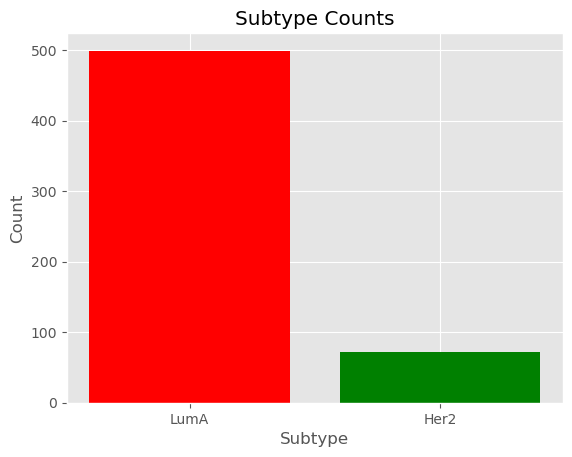

In [49]:
# x-coordinates of left sides of bars
left = [1, 2]

# heights of bars
height = [499, 72]

# labels for bars
tick_label = ['LumA', 'Her2']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
		width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Subtype')
# naming the y-axis
plt.ylabel('Count')
# plot title
plt.title('Subtype Counts')

# function to show the plot
plt.show()

In [50]:
csv2.sample_ID+="A"
csv2.head()

,Patient ID,sample_ID,Diagnosis Age,Subtype
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,55,BRCA_LumA
1,TCGA-3C-AALI,TCGA-3C-AALI-01A,50,BRCA_Her2
3,TCGA-3C-AALK,TCGA-3C-AALK-01A,52,BRCA_LumA
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01A,50,BRCA_LumA
5,TCGA-5L-AAT0,TCGA-5L-AAT0-01A,42,BRCA_LumA


In [51]:
final_data = pd.merge(embed_data,
    csv2,
    how="inner",
    on="sample_ID")
final_data

,sample_ID,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,666_y,667_y,668_y,669_y,670_y,671_y,672_y,Patient ID,Diagnosis Age,Subtype
0,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327,TCGA-E2-A14T,52,BRCA_LumA
1,TCGA-AC-A8OS-01A,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654,TCGA-AC-A8OS,71,BRCA_LumA
2,TCGA-BH-A0DG-01A,-12.604325,-0.340643,11.967080,1.610710,0.280560,17.953680,-27.989705,18.811323,2.228412,...,0.038038,-0.396669,-0.579408,0.506190,-0.125022,0.488347,-0.139261,TCGA-BH-A0DG,30,BRCA_LumA
3,TCGA-B6-A0I9-01A,-6.325858,-2.388086,-9.020493,-33.591870,27.752479,-8.679677,0.956538,9.450188,-5.864639,...,-0.227830,0.379408,-0.279471,0.265884,-0.236562,-0.240039,-0.615056,TCGA-B6-A0I9,62,BRCA_Her2
4,TCGA-A2-A0CP-01A,-20.385893,7.861396,-21.819839,9.326981,-51.542447,27.634629,6.038660,-0.779744,1.441118,...,0.026001,0.113960,0.536965,0.231773,0.411578,-1.785977,-0.621964,TCGA-A2-A0CP,60,BRCA_LumA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,TCGA-B6-A0RN-01A,-19.119775,-3.709357,4.787561,-41.341311,-14.742804,23.757800,6.692651,-7.880523,6.423455,...,0.807859,-0.258409,0.249537,-0.966236,1.013220,-0.020296,-0.731487,TCGA-B6-A0RN,60,BRCA_LumA
559,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,0.327646,-0.723310,1.121794,-0.436551,0.294458,1.208901,0.793922,TCGA-EW-A1P3,48,BRCA_LumA
560,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.421779,0.025963,0.935997,-0.008881,0.112133,0.353836,1.773742,TCGA-A2-A0T6,50,BRCA_LumA
561,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,-0.177218,-0.608730,-0.855427,-0.081818,0.014908,-0.963834,-0.319584,TCGA-A7-A5ZW,47,BRCA_LumA


In [52]:
df_ = final_data.drop(columns=["sample_ID", "Patient ID", 
                              "Diagnosis Age"]).set_index("Subtype").reset_index().dropna()
df_.head()

,Subtype,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,663_y,664_y,665_y,666_y,667_y,668_y,669_y,670_y,671_y,672_y
0,BRCA_LumA,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
1,BRCA_LumA,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.725719,-0.638721,-0.442597,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654
2,BRCA_LumA,-12.604325,-0.340643,11.967080,1.610710,0.280560,17.953680,-27.989705,18.811323,2.228412,...,-1.035894,1.898083,1.176745,0.038038,-0.396669,-0.579408,0.506190,-0.125022,0.488347,-0.139261
3,BRCA_Her2,-6.325858,-2.388086,-9.020493,-33.591870,27.752479,-8.679677,0.956538,9.450188,-5.864639,...,0.124499,0.458660,-0.569556,-0.227830,0.379408,-0.279471,0.265884,-0.236562,-0.240039,-0.615056
4,BRCA_LumA,-20.385893,7.861396,-21.819839,9.326981,-51.542447,27.634629,6.038660,-0.779744,1.441118,...,-0.621596,-1.374421,1.140453,0.026001,0.113960,0.536965,0.231773,0.411578,-1.785977,-0.621964


In [53]:
df_.dropna

<bound method DataFrame.dropna of        Subtype        0_x        1_x        2_x        3_x        4_x  \
0    BRCA_LumA -19.881249   4.919158 -11.081747 -52.865220   5.392498   
1    BRCA_LumA  20.833886 -31.343962  16.595508   7.288076 -69.033197   
2    BRCA_LumA -12.604325  -0.340643  11.967080   1.610710   0.280560   
3    BRCA_Her2  -6.325858  -2.388086  -9.020493 -33.591870  27.752479   
4    BRCA_LumA -20.385893   7.861396 -21.819839   9.326981 -51.542447   
..         ...        ...        ...        ...        ...        ...   
558  BRCA_LumA -19.119775  -3.709357   4.787561 -41.341311 -14.742804   
559  BRCA_LumA   6.489166  -7.235520 -42.221737 -29.726339 -46.306865   
560  BRCA_LumA  -5.774885 -23.128595  56.292485  -5.341560  -7.595230   
561  BRCA_LumA -17.067571   5.271614  12.188374   0.383322 -28.450796   
562  BRCA_Her2  -1.044670   2.672903   0.034207   1.843336  48.415378   

           5_x        6_x        7_x        8_x  ...     663_y     664_y  \
0    10.91983

In [54]:
df_.head()

,Subtype,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,663_y,664_y,665_y,666_y,667_y,668_y,669_y,670_y,671_y,672_y
0,BRCA_LumA,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
1,BRCA_LumA,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.725719,-0.638721,-0.442597,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654
2,BRCA_LumA,-12.604325,-0.340643,11.967080,1.610710,0.280560,17.953680,-27.989705,18.811323,2.228412,...,-1.035894,1.898083,1.176745,0.038038,-0.396669,-0.579408,0.506190,-0.125022,0.488347,-0.139261
3,BRCA_Her2,-6.325858,-2.388086,-9.020493,-33.591870,27.752479,-8.679677,0.956538,9.450188,-5.864639,...,0.124499,0.458660,-0.569556,-0.227830,0.379408,-0.279471,0.265884,-0.236562,-0.240039,-0.615056
4,BRCA_LumA,-20.385893,7.861396,-21.819839,9.326981,-51.542447,27.634629,6.038660,-0.779744,1.441118,...,-0.621596,-1.374421,1.140453,0.026001,0.113960,0.536965,0.231773,0.411578,-1.785977,-0.621964


In [55]:
df_.groupby('Subtype').size().reset_index().rename(columns={0:"Count"})

,Subtype,Count
0,BRCA_Her2,76
1,BRCA_LumA,487


In [56]:
import torch
import torch.nn as nn
from torch.utils import data
import torch.nn.functional as F
from torch.autograd import Variable as V
import torch.optim as optim
from tqdm import tqdm
 

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
Label= {
    'BRCA_LumA':0,
    #'BRCA_LumB':1,
    'BRCA_Her2':1,
    #'BRCA_Basal':3,
    #'BRCA_Normal':4
}

Labels = {v: k for k, v in Label.items()}

df_['Subtype'].replace(Label, inplace=True)

In [59]:
df_

,Subtype,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,663_y,664_y,665_y,666_y,667_y,668_y,669_y,670_y,671_y,672_y
0,0,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
1,0,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.725719,-0.638721,-0.442597,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654
2,0,-12.604325,-0.340643,11.967080,1.610710,0.280560,17.953680,-27.989705,18.811323,2.228412,...,-1.035894,1.898083,1.176745,0.038038,-0.396669,-0.579408,0.506190,-0.125022,0.488347,-0.139261
3,1,-6.325858,-2.388086,-9.020493,-33.591870,27.752479,-8.679677,0.956538,9.450188,-5.864639,...,0.124499,0.458660,-0.569556,-0.227830,0.379408,-0.279471,0.265884,-0.236562,-0.240039,-0.615056
4,0,-20.385893,7.861396,-21.819839,9.326981,-51.542447,27.634629,6.038660,-0.779744,1.441118,...,-0.621596,-1.374421,1.140453,0.026001,0.113960,0.536965,0.231773,0.411578,-1.785977,-0.621964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,-19.119775,-3.709357,4.787561,-41.341311,-14.742804,23.757800,6.692651,-7.880523,6.423455,...,-1.028795,-0.536677,-0.725346,0.807859,-0.258409,0.249537,-0.966236,1.013220,-0.020296,-0.731487
559,0,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-0.593403,1.175592,0.666564,0.327646,-0.723310,1.121794,-0.436551,0.294458,1.208901,0.793922
560,0,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,-0.752642,0.043423,-0.524034,0.421779,0.025963,0.935997,-0.008881,0.112133,0.353836,1.773742
561,0,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,-0.156862,0.172691,0.374234,-0.177218,-0.608730,-0.855427,-0.081818,0.014908,-0.963834,-0.319584


In [60]:
X_values = df_.iloc[:,1:-1]

In [61]:
y_values = df_.iloc[:,0]

In [62]:
y_values

0      0
1      0
2      0
3      1
4      0
      ..
558    0
559    0
560    0
561    0
562    1
Name: Subtype, Length: 563, dtype: int64

In [63]:
y_values.shape

(563,)

In [64]:
X_values.shape, y_values.shape,type(X_values),type(y_values)

((563, 1550), (563,), pandas.core.frame.DataFrame, pandas.core.series.Series)

In [65]:
X = torch.from_numpy(X_values.to_numpy().astype(np.float32))
y = torch.from_numpy(y_values.to_numpy().astype(np.float32))

In [66]:
y

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 

In [67]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(450, 113, 450, 113)

In [68]:
X_train.shape

torch.Size([450, 1550])

In [69]:
len(X_train), len(X_test), len(y_train), len(y_test)

(450, 113, 450, 113)

In [70]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [71]:
print('After OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of X_train: (776, 1550)
After OverSampling, the shape of y_train: (776,) 

After OverSampling, counts of label '1': 388
After OverSampling, counts of label '0': 388


In [72]:
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)

In [73]:

# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [74]:
# 1. Construct a model class that subclasses nn.Module
class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=1550, out_features=1024) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=1024, out_features=512)
        self.layer_3 = nn.Linear(in_features=512, out_features=256)
        self.layer_4 = nn.Linear(in_features=256, out_features=128)
        self.layer_5 = nn.Linear(in_features=128, out_features=64)
        self.layer_6 = nn.Linear(in_features=64, out_features=1)# takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_6(self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)))))) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_2 = BinaryClassificationModel().to(device)
model_2

BinaryClassificationModel(
  (layer_1): Linear(in_features=1550, out_features=1024, bias=True)
  (layer_2): Linear(in_features=1024, out_features=512, bias=True)
  (layer_3): Linear(in_features=512, out_features=256, bias=True)
  (layer_4): Linear(in_features=256, out_features=128, bias=True)
  (layer_5): Linear(in_features=128, out_features=64, bias=True)
  (layer_6): Linear(in_features=64, out_features=1, bias=True)
)

In [75]:
# Make predictions with the model
untrained_preds = model_2(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 113, Shape: torch.Size([113, 1])
Length of test samples: 113, Shape: torch.Size([113])

First 10 predictions:
tensor([[ 0.0591],
        [ 0.0905],
        [-0.0127],
        [-0.1594],
        [ 0.0030],
        [-0.0240],
        [-0.1222],
        [-0.0873],
        [-0.0230],
        [-0.0288]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 0.])


In [76]:
#Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                            lr=0.01)

In [77]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc


In [78]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_2(X_test.to(device))[:5]
y_logits

tensor([[ 0.0591],
        [ 0.0905],
        [-0.0127],
        [-0.1594],
        [ 0.0030]], grad_fn=<SliceBackward0>)

In [79]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.5148],
        [0.5226],
        [0.4968],
        [0.4602],
        [0.5007]], grad_fn=<SigmoidBackward0>)

In [80]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_2(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 0., 1.], grad_fn=<SqueezeBackward0>)

In [81]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 350

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_2.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_2(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_2(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 1 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.68243, Accuracy: 56.57% | Test loss: 0.66237, Test acc: 75.22%
Epoch: 1 | Loss: 0.65566, Accuracy: 75.52% | Test loss: 0.65009, Test acc: 76.11%
Epoch: 2 | Loss: 0.63064, Accuracy: 86.73% | Test loss: 0.63827, Test acc: 84.96%
Epoch: 3 | Loss: 0.60684, Accuracy: 91.24% | Test loss: 0.62672, Test acc: 86.73%
Epoch: 4 | Loss: 0.58387, Accuracy: 92.27% | Test loss: 0.61527, Test acc: 84.07%
Epoch: 5 | Loss: 0.56148, Accuracy: 92.78% | Test loss: 0.60382, Test acc: 83.19%
Epoch: 6 | Loss: 0.53953, Accuracy: 92.78% | Test loss: 0.59230, Test acc: 82.30%
Epoch: 7 | Loss: 0.51791, Accuracy: 92.91% | Test loss: 0.58066, Test acc: 83.19%
Epoch: 8 | Loss: 0.49662, Accuracy: 93.30% | Test loss: 0.56887, Test acc: 83.19%
Epoch: 9 | Loss: 0.47568, Accuracy: 93.43% | Test loss: 0.55694, Test acc: 83.19%
Epoch: 10 | Loss: 0.45514, Accuracy: 93.17% | Test loss: 0.54486, Test acc: 84.07%
Epoch: 11 | Loss: 0.43509, Accuracy: 93.43% | Test loss: 0.53268, Test acc: 84.07%
Epoch: 12 | Lo

Epoch: 102 | Loss: 0.03112, Accuracy: 99.61% | Test loss: 0.09204, Test acc: 96.46%
Epoch: 103 | Loss: 0.03050, Accuracy: 99.61% | Test loss: 0.09118, Test acc: 96.46%
Epoch: 104 | Loss: 0.02990, Accuracy: 99.61% | Test loss: 0.09033, Test acc: 97.35%
Epoch: 105 | Loss: 0.02931, Accuracy: 99.61% | Test loss: 0.08950, Test acc: 97.35%
Epoch: 106 | Loss: 0.02873, Accuracy: 99.61% | Test loss: 0.08870, Test acc: 97.35%
Epoch: 107 | Loss: 0.02817, Accuracy: 99.74% | Test loss: 0.08791, Test acc: 97.35%
Epoch: 108 | Loss: 0.02762, Accuracy: 99.74% | Test loss: 0.08714, Test acc: 97.35%
Epoch: 109 | Loss: 0.02709, Accuracy: 99.74% | Test loss: 0.08638, Test acc: 97.35%
Epoch: 110 | Loss: 0.02657, Accuracy: 99.74% | Test loss: 0.08565, Test acc: 97.35%
Epoch: 111 | Loss: 0.02607, Accuracy: 99.74% | Test loss: 0.08493, Test acc: 97.35%
Epoch: 112 | Loss: 0.02557, Accuracy: 99.74% | Test loss: 0.08422, Test acc: 97.35%
Epoch: 113 | Loss: 0.02509, Accuracy: 99.74% | Test loss: 0.08353, Test acc:

Epoch: 201 | Loss: 0.00698, Accuracy: 100.00% | Test loss: 0.05409, Test acc: 99.12%
Epoch: 202 | Loss: 0.00690, Accuracy: 100.00% | Test loss: 0.05393, Test acc: 99.12%
Epoch: 203 | Loss: 0.00683, Accuracy: 100.00% | Test loss: 0.05378, Test acc: 99.12%
Epoch: 204 | Loss: 0.00676, Accuracy: 100.00% | Test loss: 0.05362, Test acc: 99.12%
Epoch: 205 | Loss: 0.00669, Accuracy: 100.00% | Test loss: 0.05347, Test acc: 99.12%
Epoch: 206 | Loss: 0.00662, Accuracy: 100.00% | Test loss: 0.05332, Test acc: 99.12%
Epoch: 207 | Loss: 0.00655, Accuracy: 100.00% | Test loss: 0.05317, Test acc: 99.12%
Epoch: 208 | Loss: 0.00648, Accuracy: 100.00% | Test loss: 0.05302, Test acc: 99.12%
Epoch: 209 | Loss: 0.00641, Accuracy: 100.00% | Test loss: 0.05287, Test acc: 99.12%
Epoch: 210 | Loss: 0.00635, Accuracy: 100.00% | Test loss: 0.05273, Test acc: 99.12%
Epoch: 211 | Loss: 0.00628, Accuracy: 100.00% | Test loss: 0.05258, Test acc: 99.12%
Epoch: 212 | Loss: 0.00622, Accuracy: 100.00% | Test loss: 0.0524

Epoch: 302 | Loss: 0.00300, Accuracy: 100.00% | Test loss: 0.04393, Test acc: 99.12%
Epoch: 303 | Loss: 0.00298, Accuracy: 100.00% | Test loss: 0.04386, Test acc: 99.12%
Epoch: 304 | Loss: 0.00296, Accuracy: 100.00% | Test loss: 0.04380, Test acc: 99.12%
Epoch: 305 | Loss: 0.00294, Accuracy: 100.00% | Test loss: 0.04374, Test acc: 99.12%
Epoch: 306 | Loss: 0.00292, Accuracy: 100.00% | Test loss: 0.04367, Test acc: 99.12%
Epoch: 307 | Loss: 0.00290, Accuracy: 100.00% | Test loss: 0.04361, Test acc: 99.12%
Epoch: 308 | Loss: 0.00288, Accuracy: 100.00% | Test loss: 0.04355, Test acc: 99.12%
Epoch: 309 | Loss: 0.00287, Accuracy: 100.00% | Test loss: 0.04349, Test acc: 99.12%
Epoch: 310 | Loss: 0.00285, Accuracy: 100.00% | Test loss: 0.04343, Test acc: 99.12%
Epoch: 311 | Loss: 0.00283, Accuracy: 100.00% | Test loss: 0.04337, Test acc: 99.12%
Epoch: 312 | Loss: 0.00281, Accuracy: 100.00% | Test loss: 0.04330, Test acc: 99.12%
Epoch: 313 | Loss: 0.00279, Accuracy: 100.00% | Test loss: 0.0432

tensor([[-19.8812,   4.9192, -11.0817,  ...,   0.2844,  -0.9928,  -0.3798],
        [ 20.8339, -31.3440,  16.5955,  ...,   0.8189,  -0.9550,   0.2683],
        [-12.6043,  -0.3406,  11.9671,  ...,   0.5062,  -0.1250,   0.4883],
        [ -6.3259,  -2.3881,  -9.0205,  ...,   0.2659,  -0.2366,  -0.2400],
        [-20.3859,   7.8614, -21.8198,  ...,   0.2318,   0.4116,  -1.7860]]) tensor([0., 0., 0., 1., 0.])


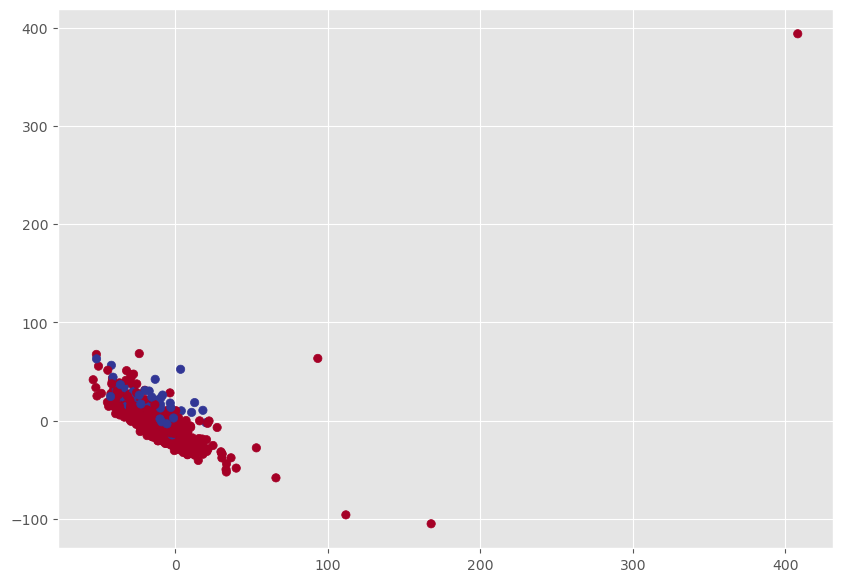

In [82]:
# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);
print(X[:5], y[:5])

In [83]:
# Make predictions
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]))

In [84]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)

# Turn prediction probabilities into prediction labels
#y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_pred=y_preds)}%")


Predictions: tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
Labels: tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
Test accuracy: 99.11504424778761%


In [85]:
import seaborn as sns

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

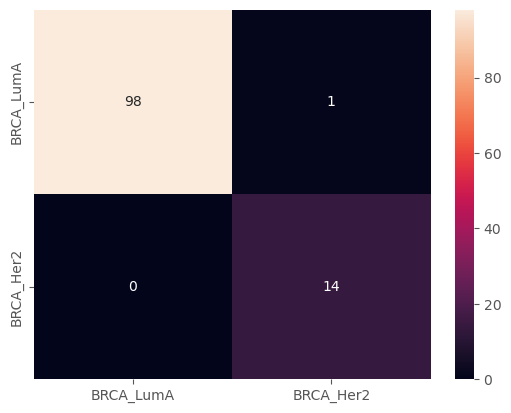

In [87]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_preds)).rename(columns=Labels, index=Labels)

sns.heatmap(confusion_matrix_df, annot=True)

In [88]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        99
         1.0       0.93      1.00      0.97        14

    accuracy                           0.99       113
   macro avg       0.97      0.99      0.98       113
weighted avg       0.99      0.99      0.99       113



roc_auc_score for binary classifier:  0.994949494949495


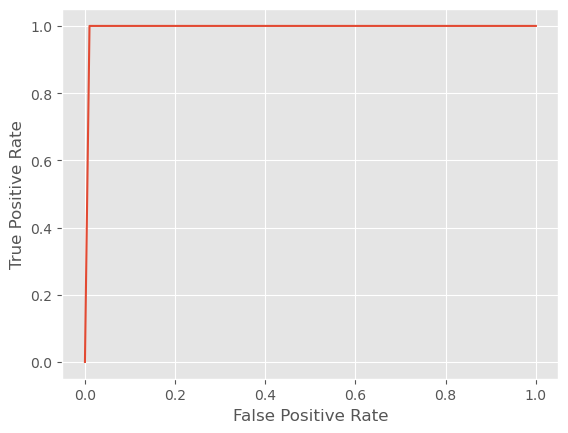

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_preds)
print('roc_auc_score for binary classifier: ', roc_auc_score(y_test, y_preds))
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

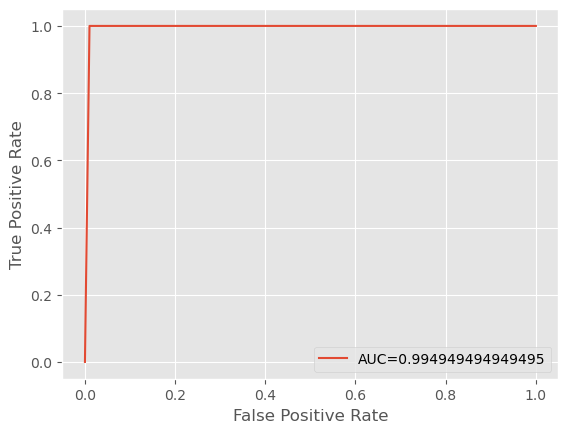

In [90]:
auc = roc_auc_score(y_test, y_preds)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()